In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import numpy as np

def find_left_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    left_boundary = None
    for col in range(width):
        for row in range(height):
            if any(image_array[row, col] < threshold):
                left_boundary = col
                #print("left_boundary = ", left_boundary)
                break
        if left_boundary is not None:
            break

    if left_boundary is None:
        left_boundary = 0

    return left_boundary

# Example usage:
# Assuming you have the image as a 3D NumPy array named 'image'
# left_boundary = find_left_boundary(image)


In [23]:
def find_right_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    right_boundary = None
    for col in range(width - 1, -1, -1):
        for row in range(height):
            if any(image_array[row, col] < threshold):
                right_boundary = col
                #print("right_boundary = ", right_boundary)
                break
        if right_boundary is not None:
            break

    if right_boundary is None:
        right_boundary = width - 1

    return right_boundary


In [24]:
def find_top_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    top_boundary = None
    for row in range(height):
        for col in range(width):
            if any(image_array[row, col] < threshold):
                top_boundary = row
                break
        if top_boundary is not None:
            break

    if top_boundary is None:
        top_boundary = 0

    return top_boundary

In [25]:
def find_bottom_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    bottom_boundary = None
    for row in range(height - 1, -1, -1):
        for col in range(width):
            if any(image_array[row, col] < threshold):
                bottom_boundary = row
                break
        if bottom_boundary is not None:
            break

    if bottom_boundary is None:
        bottom_boundary = height - 1

    return bottom_boundary

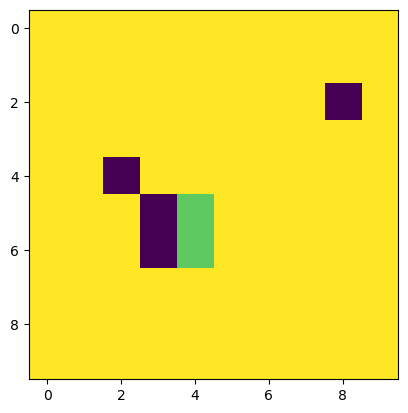

In [36]:
test_matrix = np.array([
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [200], [240]], #
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]], 
    [[240], [240], [200], [240], [240], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [200], [230], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [200], [230], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]]
])

plt.imshow(test_matrix)

In [27]:
threshold = 230

left_boundary = find_left_boundary(test_matrix, threshold)
print("Left Boundary:", left_boundary)

right_boundary = find_right_boundary(test_matrix, threshold)
print("Left Boundary:", right_boundary)

top_boundary = find_top_boundary(test_matrix, threshold)
print("top Boundary:", top_boundary)

bottom_boundary = find_bottom_boundary(test_matrix, threshold)
print("bottom Boundary:", bottom_boundary)

Left Boundary: 2
Left Boundary: 8
top Boundary: 2
bottom Boundary: 6


In [29]:
def crop_image(image_array, left_boundary, right_boundary, top_boundary, bottom_boundary):
    cropped_image = image_array[top_boundary:bottom_boundary+1, left_boundary:right_boundary+1, :]
    return cropped_image

# Example usage:
# Assuming you have the image as a 3D NumPy array named 'image'
# and you have already calculated the boundaries using the functions mentioned earlier

image = test_matrix

# Calculate the boundaries (assuming you have the threshold defined)
left_boundary = find_left_boundary(image, threshold)
right_boundary = find_right_boundary(image, threshold)
top_boundary = find_top_boundary(image, threshold)
bottom_boundary = find_bottom_boundary(image, threshold)

# Crop the image using the calculated boundaries
cropped_image = crop_image(image, left_boundary, right_boundary, top_boundary, bottom_boundary)

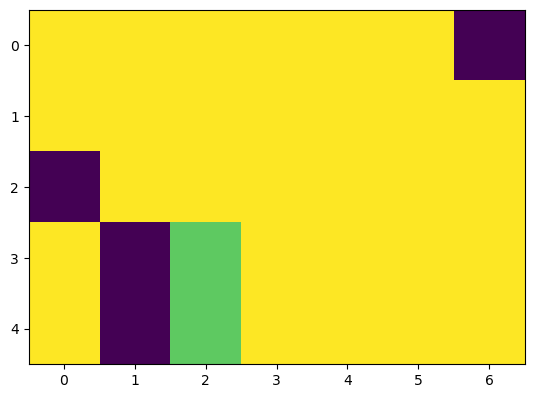

In [37]:
#display(cropped_image)
plt.imshow(test_matrix)
plt.imshow(cropped_image)

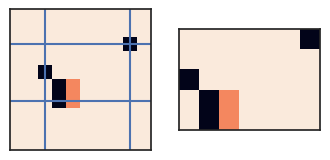

In [42]:
import seaborn as sns
sns.set_style("white")
_, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(image)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])


ax[1].imshow(cropped_image)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])

# ax.plot(39,5,marker = '*')
ax[0].axhline(y = top_boundary)
ax[0].axhline(y = bottom_boundary)
ax[0].axvline(x = left_boundary)
ax[0].axvline(x = right_boundary)
sns.set()

In [7]:
from datetime import date, datetime
today = date.today()
# print("Today's date:", today)
now = datetime.now() 
# print("now =", now)
today.strftime("%Y%m%d") +'_'+ now.strftime("%H%M")


'20230731_1751'

'20230731_1749'

### There is a bug in top or bottom boundaries

In [148]:

def find_left_boundary(image_array, threshold):
    height, width, _ = image_array.shape

    left_boundary = None
    for col in range(width):
        
        if np.any(image_array[:,col,:] < threshold):
            left_boundary = col
            break

    if left_boundary is None:
        left_boundary = 0

    return left_boundary

def find_right_boundary(image_array, threshold):
    height, width, _ = image_array.shape

    right_boundary = None
    for col in range(width - 1, -1, -1):
        
        if np.any(image_array[:,col,:] < threshold):
            right_boundary = col
            break

    if right_boundary is None:
        right_boundary = width - 1

    return right_boundary

def find_top_boundary(image_array, threshold):
    height, width, _ = image_array.shape

    top_boundary = None
    for row in range(height):
    
        if np.any(image_array[row,:,:] < threshold):
            top_boundary = row
            break

    if top_boundary is None:
        top_boundary = 0

    return top_boundary

def find_bottom_boundary(image_array, threshold):
    height, width, _ = image_array.shape

    bottom_boundary = None
    for row in range(height - 1, -1, -1):
        
        if np.any(image_array[row,:,:] < threshold):
            bottom_boundary = row
            break

    if bottom_boundary is None:
        bottom_boundary = height - 1

    return bottom_boundary

# l, r, t, b  = 2 8 3 6

# cw = 8-2+1 = 7
# ch = 6-3+1 = 4
# sl = max(7,4) = 7

# hp = (7-7)//2 = 0
# vp = (7-4)//2 = 3//2 = 1 ****

# L = max(0,2-0) = 2
# R = min(10-1, 8+0) = min(9,8) = 8
# T = max(0, 3-1) = 2 ****
# B = min(10-1, 6+1) = 7 ****

def crop_square(image_array, left, right, top, bottom):
    cropped_width = right - left + 1
    cropped_height = bottom - top + 1
    
#     if cropped_width % 2 != 0:
#         cropped_width += 1
#         print("a")
#     if cropped_height % 2 != 0:
#         cropped_height += 1
#         print("b")
    print("cw, ch =", cropped_width, cropped_height)

    # Calculate the side length of the largest square that fits all boundaries
    side_length = max(cropped_width, cropped_height)
    print("side_length =", side_length)
    
    horizontal_pad = (side_length - cropped_width) // 2
    vertical_pad = (side_length - cropped_height ) // 2 
    
    print("hp", horizontal_pad)
    print("vp", vertical_pad)
    
    left_new = max(0, left - horizontal_pad)
    right_new = min(image_array.shape[1] - 1, right + horizontal_pad)
    top_new = max(0, top - vertical_pad)
    bottom_new = min(image_array.shape[0] - 1, bottom + vertical_pad )
    
#     print("differences:")
#     print((right_new - left_new)) 
#     print((bottom_new - top_new))
    if (right_new - left_new) > (bottom_new - top_new):
            if top_new > 0:
                top_new = top - vertical_pad - 1
            elif bottom_new < image_array.shape[0] - 1:
                bottom_new = bottom + vertical_pad + 1
    elif (right_new - left_new) < (bottom_new - top_new):
            if left_new > 0:
                left_new = left - horizontal_pad - 1
            elif right_new < image_array.shape[1] - 1:
                right_new = right + horizontal_pad + 1

    
    
    
    print("new_boundaries LRTB = ",left_new, right_new, top_new, bottom_new)

    cropped_image = image_array[top_new : bottom_new+1, left_new : right_new+1, :]
    return cropped_image

(10, 10, 1)
(10, 10, 1)


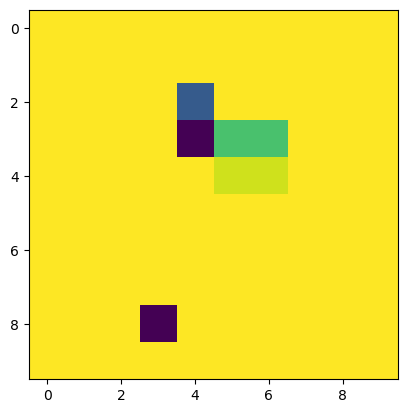

In [158]:
image = np.array([
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [240], [240], [240], [240], [240], [100], [240]], 
    [[240], [240], [140], [100], [240], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [200], [230], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [200], [230], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]]
])

print(image.shape)
image[:,:,0] = image[:,:,0].transpose()

plt.imshow(image)
print(image.shape)

In [159]:
#image = test_matrix
threshold = 230

# Calculate the boundaries (assuming you have the threshold defined)
left_boundary = find_left_boundary(image, threshold)
right_boundary = find_right_boundary(image, threshold)
top_boundary = find_top_boundary(image, threshold)
bottom_boundary = find_bottom_boundary(image, threshold)

print("Left Boundary:", left_boundary)
print("Right Boundary:", right_boundary)
print("top Boundary:", top_boundary)
print("bottom Boundary:", bottom_boundary)


# Crop the image using the calculated boundaries
cropped_image = crop_square(image, left_boundary, right_boundary, top_boundary, bottom_boundary)

Left Boundary: 3
Right Boundary: 6
top Boundary: 2
bottom Boundary: 8
cw, ch = 4 7
side_length = 7
hp 1
vp 0
new_boundaries LRTB =  1 7 2 8


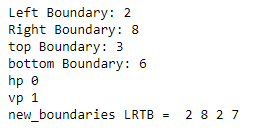

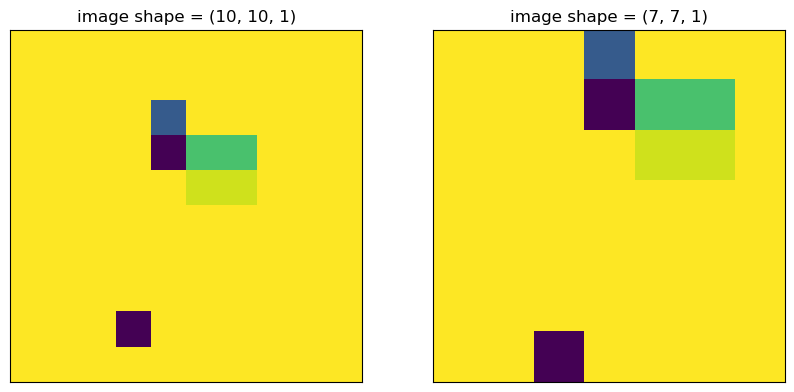

In [160]:

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(image[:,:,::-1])
axs[1].imshow(cropped_image[:,:,::-1])

axs[0].set_title("image shape = " + str(image.shape))
axs[1].set_title("image shape = " + str(cropped_image.shape))

for ax in axs:
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    Ramiro This is an important message
</div>

In [23]:
import numpy as np
x = np.arange(0,100,1) + 1
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [24]:
xv = x.reshape(-1,1)

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(with_centering = False, quantile_range = (0.0 , 75.0) ).fit(xv)
x_sc = scaler.transform(xv)

x_sc[72:77]

array([[0.98316498],
       [0.996633  ],
       [1.01010101],
       [1.02356902],
       [1.03703704]])

In [28]:
scaler.center_

In [29]:
scaler.scale_

array([74.25])

In [8]:
import numpy as np
from scipy.sparse import csr_matrix
X1 = csr_matrix((3, 4), dtype=float)

type(X1)
# print(X1)
# scipy.sparse.csr.csr_matrix

# this will not work:
# X_train.todense()
# type(X_train)
# scipy.sparse.csr.csr_matrix # still sparse

# this will work:
# X_train = X_train.toarray()
# type(X_train)
# numpy.ndarray

scipy.sparse._csr.csr_matrix

In [12]:
print(X1.todense())

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
print(X1.toarray())

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
